# Exploratory Data Analysis

When placed in Metapack data package, this notebook will load the package and run a variety of common EDA operations on the first resource. 


In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')


In [2]:
pkg = mp.jupyter.open_package()

# For testing and development
#pkg = mp.open_package('http://s3.amazonaws.com/library.metatab.org/cde.ca.gov-accountability_dashboard-2.zip')

pkg

# Response to Resistance
`austintexas.gov-response_to_resistance-1.1.1` Last Update: 2020-06-10T04:54:03

_Austin Police Department response to police resistance incidents._


## Documentation Links

* [Data Dictionary](https://data.austintexas.gov/Public-Safety/GUIDE-2017-R2R/27tg-e4dt/data) A spreadsheet with field definitions, for 2017
* [R2R Datasets](https://data.austintexas.gov/browse?q=Response+To+Resistence&sortBy=relevance&page=1) A search on the Austin open data site for R2R datasets.

 

## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)

## Resources

* ** [r2r_2015](data/r2r_2015.csv)**. Response to Resistance, 2015
* ** [r2r_2016](data/r2r_2016.csv)**. Response to Resistance, 2016
* ** [r2r_2017](data/r2r_2017.csv)**. Response to Resistance, 2017
* ** [r2r_2018](data/r2r_2018.csv)**. Response to Resistance, 2018
* ** [r2r_2015_2018](data/r2r_2015_2018.csv)**. Combined R2R files, 2015 to 2018

In [3]:
resource_name='r2r_2015_2018'

In [4]:
pkg.resource(resource_name)

Header,Type,Description
rin,integer,
primary_key,integer,
date_occurred,datetime,
time_occurred,string,
location,string,
area_command,string,
nature_of_contact,string,
reason_desc,string,
r2r_level,integer,
master_subject_id,string,


In [5]:
df = pkg.resource(resource_name).read_csv(parse_dates=True)

In [6]:
df.head()

,rin,primary_key,date_occurred,time_occurred,location,area_command,nature_of_contact,reason_desc,r2r_level,master_subject_id,...,sr_other,sr_preparatory_resistance,sr_evading_fleeing_motor_vehicle,sr_expired_code_evading_fleeing_motor_vehicle,sr_aggressive_resistance,sr_defensive_resistance,sr_passive_resistance,sr_expired_code_passive_resistance,sr_expired_code_empty_hand_active_aggression,sr
0,154619,201510652,2015-01-01,0220,E 6TH ST / TRINITY ST,GE,VIEWED OFFENSE,NECESSARY TO EFFECT ARREST / DETENTION,3.0,459228703: 201510652,...,False,False,False,False,False,False,False,True,False,False
1,154620,201510652,2015-01-01,0225,E 6TH ST / TRINITY ST,GE,VIEWED OFFENSE,NECESSARY TO EFFECT ARREST / DETENTION,3.0,459228703: 201510652,...,False,False,False,False,False,False,True,True,False,False
2,155009,201510652,2015-01-01,,E 6TH ST / TRINITY ST,GE,VIEWED OFFENSE,NECESSARY TO EFFECT ARREST / DETENTION,3.0,459228703: 201510652,...,False,False,False,False,False,False,False,True,False,False
3,154764,201520457,2015-01-02,0943,1900 FARO DR,HE,DISPATCHED CALL,TO RESTRAIN FOR SUBJECTS SAFETY,3.0,356649076: 201520457,...,False,False,False,False,False,False,True,True,False,False
4,154859,201520457,2015-01-02,0943,1900 FARO DR,HE,DISPATCHED CALL,"IN CUSTODY, MAINTAINING CONTROL",3.0,356649076: 201520457,...,False,False,False,False,False,False,False,True,False,False


In [7]:
empty_col_names = [cn for cn in df.columns if df[cn].nunique() == 0]
const_col_names= [cn for cn in df.columns if df[cn].nunique() == 1]
ignore_cols = empty_col_names+const_col_names
dt_col_names= list(df.select_dtypes(include=[np.datetime64]).columns)

number_col_names = [ cn for cn in df.select_dtypes(include=[np.number]).columns if cn not in ignore_cols ]
other_col_names = [cn for cn in df.columns if cn not in (empty_col_names+const_col_names+dt_col_names+number_col_names)]

In [8]:
pd.DataFrame.from_dict({'empty':[len(empty_col_names)], 
                        'const':[len(const_col_names)],
                        'datetime':[len(dt_col_names)],
                        'number':[len(number_col_names)],
                        'other':[len(other_col_names)],
                       }, 
                       orient='index', columns=['count'])

,count
empty,0
const,2
datetime,2
number,10
other,43


# Constant Columns

In [9]:
if const_col_names:
    display(df[const_col_names].drop_duplicates().T)

,0,6955
weapon_used_5,NaN,WEAPONLESS (PRESSURE POINTS/KICKS/HAND)
sr_firearm,False,False


# Empty Columns

In [10]:
if empty_col_names:
    display(df[empty_col_names].drop_duplicates().T)

# Date and Time Columns

In [11]:
if dt_col_names:
    display(df[dt_col_names].info())
    display(df[dt_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14352 entries, 0 to 14351
Data columns (total 2 columns):
date_occurred              14352 non-null datetime64[ns]
officer_commission_date    14349 non-null datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 224.4 KB


None

,count,unique,top,freq,first,last
date_occurred,14352,1446,2018-11-01,48,2015-01-01,2018-12-31
officer_commission_date,14349,119,2012-11-30,951,1900-01-02,2018-09-02


# Number Columns

In [12]:
if number_col_names:
    display(df[number_col_names].info())
    display(df[number_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14352 entries, 0 to 14351
Data columns (total 10 columns):
rin                       14352 non-null int64
primary_key               14352 non-null int64
r2r_level                 14349 non-null float64
number_shots              2575 non-null float64
officer_yrs_of_service    14352 non-null int64
x_coordinate              14278 non-null float64
y_coordinate              14278 non-null float64
council_district          14222 non-null float64
census_tract              4975 non-null float64
zip                       4142 non-null float64
dtypes: float64(7), int64(3)
memory usage: 1.1 MB


None

,count,mean,std,min,25%,50%,75%,max
rin,14352.0,1.838028e+05,1.678377e+04,1.546190e+05,1.710598e+05,1.785635e+05,1.985072e+05,2.273810e+05
primary_key,14352.0,1.532805e+10,8.074761e+09,2.015107e+08,2.018771e+09,2.016208e+10,2.017329e+10,2.018690e+10
r2r_level,14349.0,3.046554e+00,1.644764e+00,0.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.400000e+01
number_shots,2575.0,1.220583e+00,1.585520e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,3.000000e+01
officer_yrs_of_service,14352.0,5.856257e+00,5.503893e+00,-1.000000e+00,2.000000e+00,4.000000e+00,8.000000e+00,3.300000e+01
x_coordinate,14278.0,3.120828e+06,2.996512e+05,3.059470e+06,3.114486e+06,3.116325e+06,3.126028e+06,3.889524e+07
y_coordinate,14278.0,1.007680e+07,5.680528e+04,1.000240e+07,1.006119e+07,1.007060e+07,1.009114e+07,1.625177e+07
council_district,14222.0,5.380397e+00,3.054276e+00,1.000000e+00,3.000000e+00,4.000000e+00,9.000000e+00,1.000000e+01
census_tract,4975.0,5.167712e+01,5.543904e+02,1.010000e+00,1.100000e+01,1.813000e+01,2.201000e+01,9.800000e+03
zip,4142.0,7.872588e+04,2.532083e+01,7.861300e+04,7.870100e+04,7.872400e+04,7.874800e+04,7.875900e+04


## Distributions

In [13]:
def plot_histograms(df):

    col_names = list(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    #plt.figure(figsize=(3*n_cols,3*n_rows))
    fig, ax = plt.subplots(figsize=(3*n_cols,3*n_rows))
    
    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            g = sns.distplot(df[col_names[i]].dropna(),kde=True) 
            g.set(xticklabels=[])
            g.set(yticklabels=[])
        except:
            pass
        
    plt.tight_layout()
        


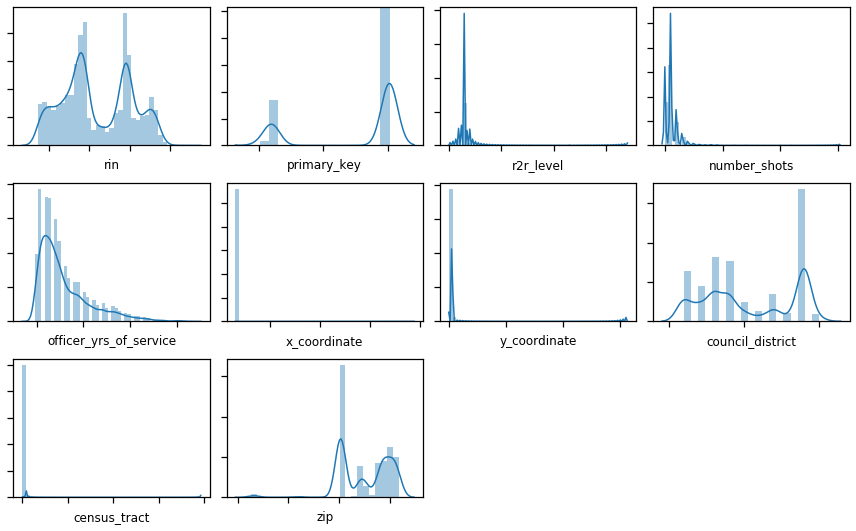

In [14]:
plot_histograms(df[number_col_names])

## Box Plots

In [15]:
def plot_boxes(df):

    col_names = list(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    #plt.figure(figsize=(2*n_cols,3*n_rows))
    fig, ax = plt.subplots(figsize=(2*n_cols,5*n_rows))
    
    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            g = sns.boxplot(df[col_names[i]].dropna(),orient='v') 
        except:
            pass
        
    plt.tight_layout()
  

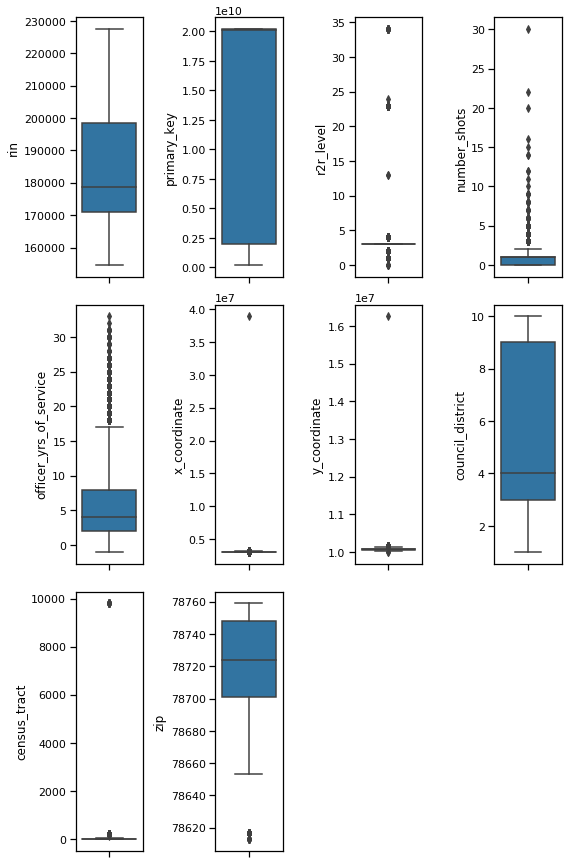

In [16]:
  
plot_boxes(df[number_col_names])

In [17]:
## Correlations

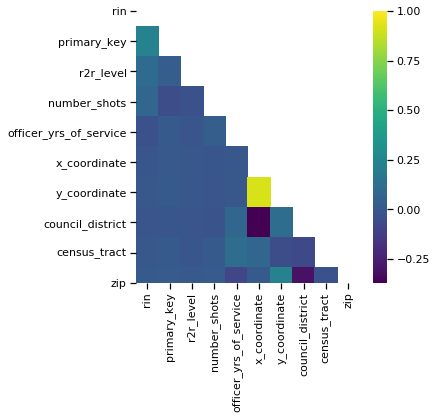

In [18]:

cm = df[number_col_names].corr()

mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(.5*len(number_col_names),.5*len(number_col_names)))
sns.heatmap(cm, mask=mask, cmap = 'viridis')   

# Other Columns

In [19]:
if other_col_names:
    display(df[other_col_names].info())
    display(df[other_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14352 entries, 0 to 14351
Data columns (total 43 columns):
time_occurred                                      11396 non-null object
location                                           14352 non-null object
area_command                                       14338 non-null object
nature_of_contact                                  14342 non-null object
reason_desc                                        14339 non-null object
master_subject_id                                  14288 non-null object
subject_sex                                        13848 non-null object
subject_race                                       13848 non-null object
subject_ethnicity                                  13686 non-null object
subject_conduct_desc                               11265 non-null object
subject_resistance                                 14348 non-null object
weapon_used_1                                      14271 non-null object
weapon_used_2  

None

,count,unique,top,freq
time_occurred,11396,2194,,760
location,14352,4127,400 E 6TH ST,314
area_command,14338,12,GE,3943
nature_of_contact,14342,14,DISPATCHED CALL,6209
reason_desc,14339,8,NECESSARY TO EFFECT ARREST / DETENTION,9120
master_subject_id,14288,7793,17445412: 20181920772,10
subject_sex,13848,3,M,11051
subject_race,13848,7,W,9118
subject_ethnicity,13686,3,N,8969
subject_conduct_desc,11265,3,SUSPECTED UNDER INFLUENCE OF ALCOHOL/DRUGS,7031


# Nulls


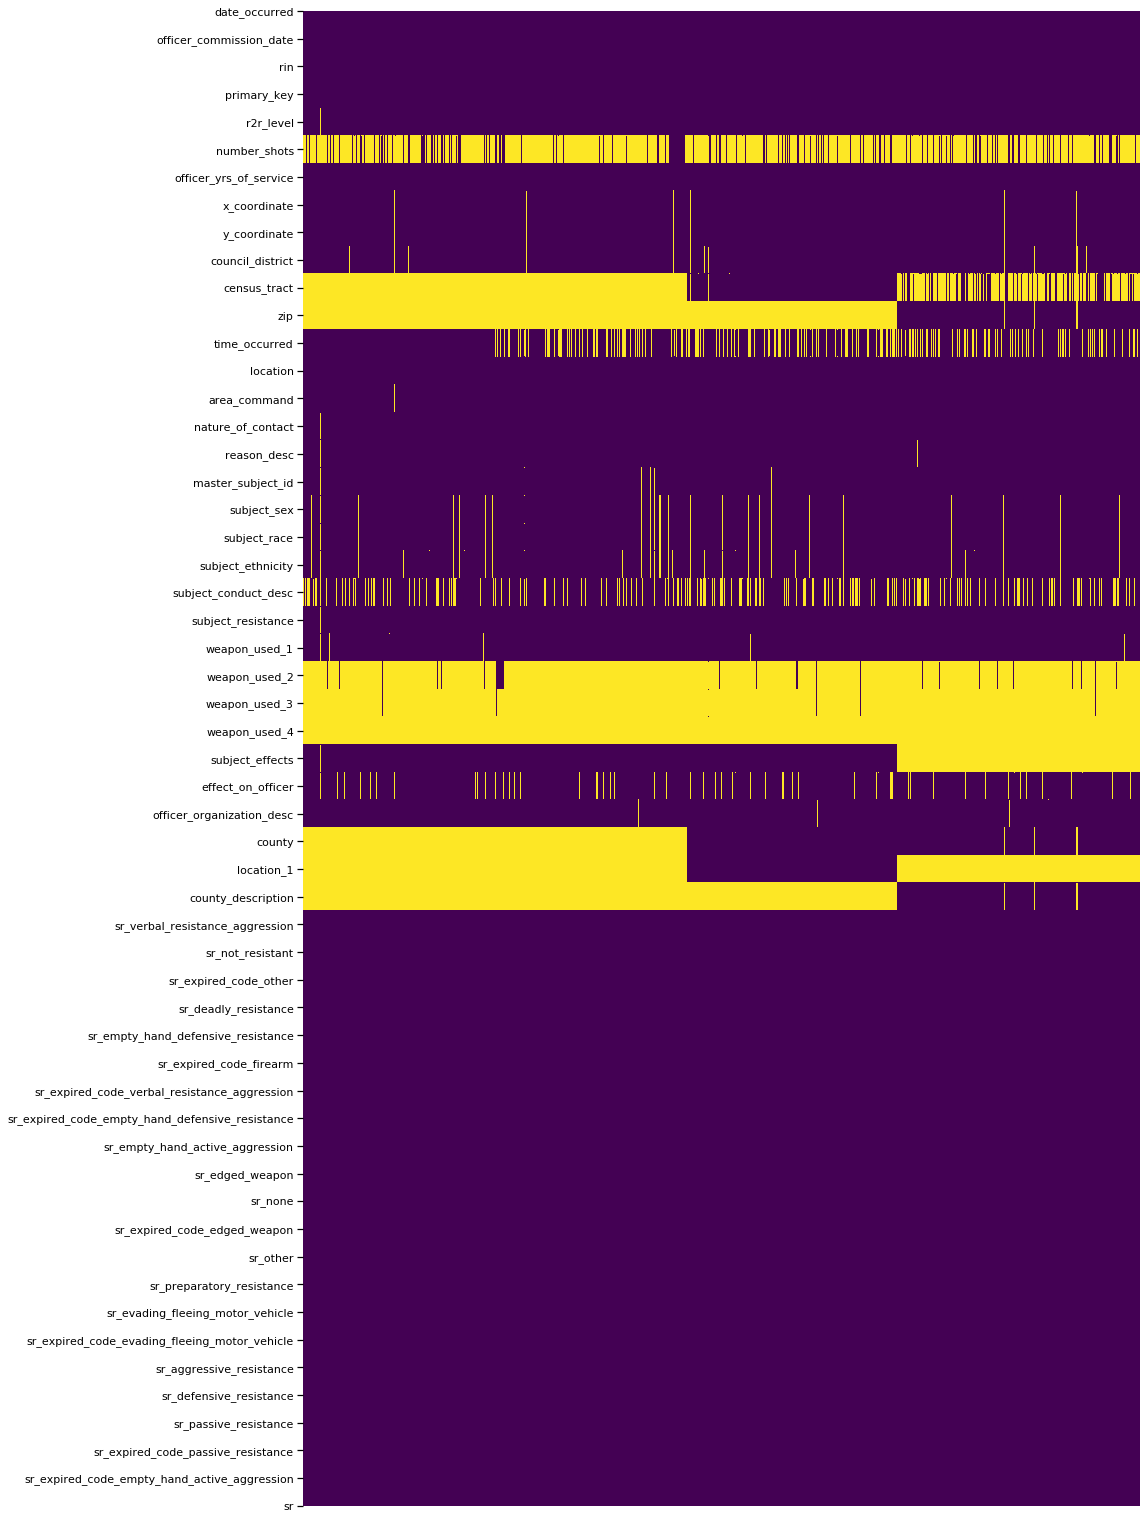

In [20]:
cols = dt_col_names + number_col_names + other_col_names

fig, ax = plt.subplots(figsize=(15,.5*len(cols)))
sns.heatmap(df[cols].isnull().T,cbar=False,xticklabels=False,cmap = 'viridis', ax=ax )